In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter, sobel
from skimage.metrics import structural_similarity as ssim
import cv2 as cv
%matplotlib inline

from src.utils import *
from src.fusion import *
from src.metrics import (structural_similarity_metric, 
                        structural_similarity_metric_colored, 
                        normalized_mutual_information_metric, 
                        edge_information_metric)

In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import images

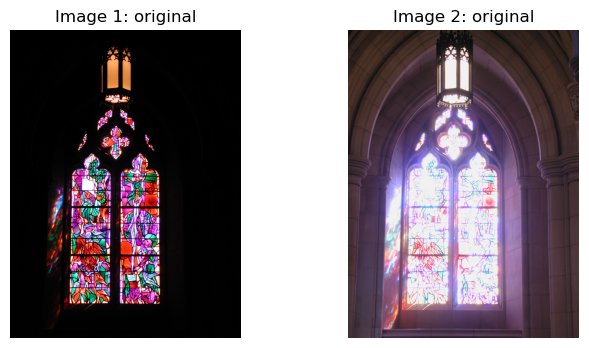

In [42]:
im1 = plt.imread("dataset/cathedral1.jpg")
im2 = plt.imread("dataset/cathedral2.jpg")
show_images(im1, im2, "original", "original")

# Test image fusion

In [43]:
fused_image = fuse_images([im1, im2], verbose=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1535.5, 2047.5, -0.5)

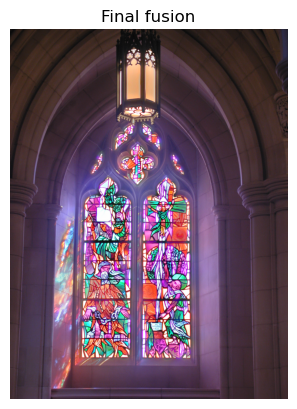

In [44]:
plt.imshow(fused_image)
plt.title("Final fusion")
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 399.5, 399.5, -0.5)

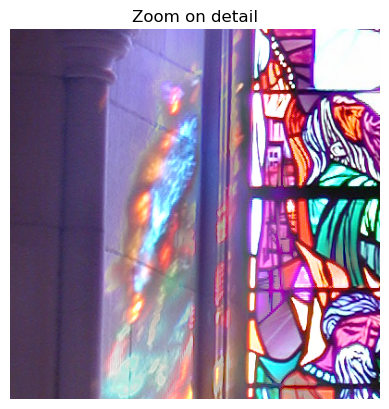

In [51]:
#Zooming on details
top_left = [1000,150]
plt.imshow(fused_image[top_left[0]:top_left[0]+400, top_left[1]:top_left[1]+400, :])
plt.title("Zoom on detail")
plt.axis('off')

# Test without base+layer decomposition

In [52]:
fused_image = fuse_images_no_decomposition([im1, im2], r=45, eps=0.3)

(-0.5, 1535.5, 2047.5, -0.5)

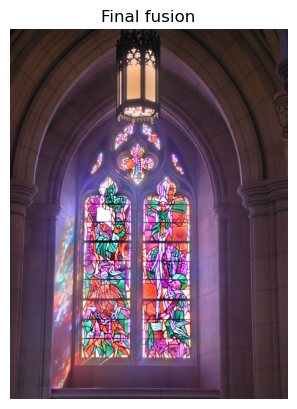

In [53]:
plt.imshow(fused_image)
plt.title("Final fusion")
plt.axis('off')

(-0.5, 399.5, 399.5, -0.5)

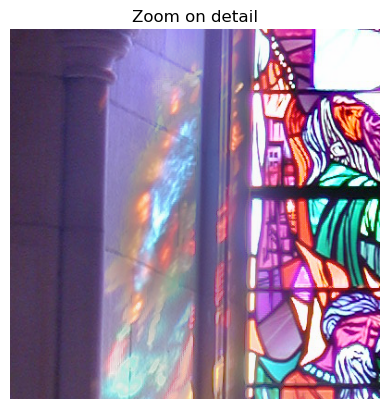

In [54]:
#Zooming on details
top_left = [1000,150]
plt.imshow(fused_image[top_left[0]:top_left[0]+400, top_left[1]:top_left[1]+400, :])
plt.title("Zoom on detail")
plt.axis('off')

# Testing on other multi-focus images

In [15]:
golf1 = plt.imread("dataset/multi-focus/grayscale/g_09_1.tif")
golf2 = plt.imread("dataset/multi-focus/grayscale/g_09_2.tif")
fused_golf = fuse_images([golf1, golf2])
print(fused_golf.shape)

(234, 322)


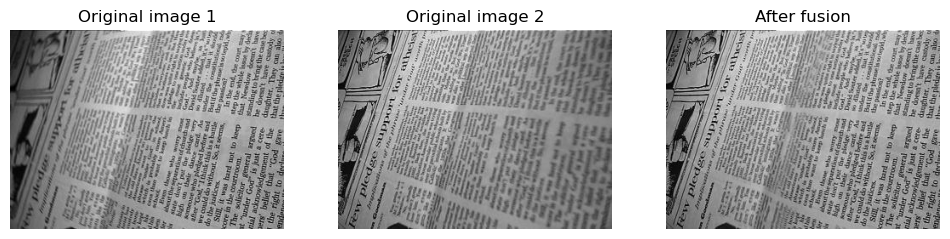

In [141]:
show_3_images(golf1, golf2, fused_golf, "Original image 1", "Original image 2", "After fusion", gray=True)

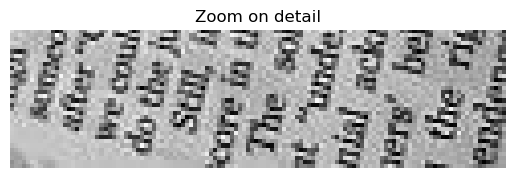

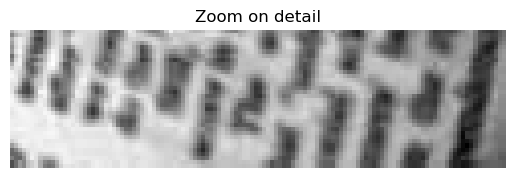

In [142]:
#Zooming on details
top_left = [200,200]
plt.imshow(fused_golf[top_left[0]:top_left[0]+200, top_left[1]:top_left[1]+200], cmap="gray")
plt.title("Zoom on detail")
plt.axis('off')
plt.show()
plt.imshow(golf2[top_left[0]:top_left[0]+200, top_left[1]:top_left[1]+200], cmap="gray")
plt.title("Zoom on detail")
plt.axis('off')
plt.show()

# Metrics

In [6]:
normalized_mutual_information_metric(rgb2gray(golf1), rgb2gray(golf2), rgb2gray(fused_golf))

0.9271456195305225

In [7]:
structural_similarity_metric(rgb2gray(golf1), rgb2gray(golf2), rgb2gray(fused_golf), 7)

0.9865127456334838

In [6]:
#Hyperparameters chosen as in the article https://www.researchgate.net/publication/3381966_Objective_image_fusion_performance_measure
#In our studied article, the authors do not specify the values of hyperparameters
gamma_g=0.9994
gamma_o=0.9879
kappa_g=-15
kappa_o=-22
sigma_g=0.5
sigma_o=0.8
L = 1.5

Q = edge_information_metric(rgb2gray(im1), rgb2gray(im2), rgb2gray(fused_image), gamma_g, gamma_o, kappa_g, kappa_o, sigma_g, sigma_o, L)
print(Q)

0.8207379221984255


# Impacts of hyperparameters

In [9]:
average_filter_size_standard=31
laplacian_kernel_size_standard=3
gaussian_filter_sigma_standard=5
gaussian_filter_radius_standard=5
local_average_size_standard=7
r1_standard=45
eps1_standard=0.3
r2_standard=7
eps2_standard=1e-6

test_img1 = plt.imread("dataset/multi-focus/color/c_03_1.tif")
test_img2 = plt.imread("dataset/multi-focus/color/c_03_2.tif")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


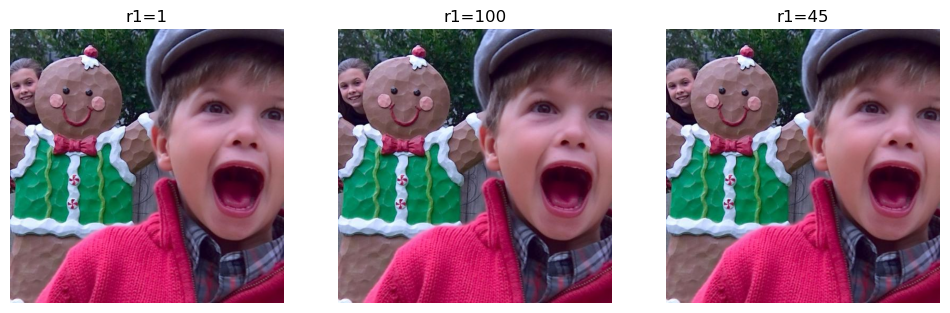

In [10]:
list_r1 = [1, 100 , r1_standard]
_, axes = plt.subplots(1, 3, figsize=(12, 5))
for i, r1 in enumerate(list_r1):
    fused_test_img = fuse_images([test_img1, test_img2], r1=r1)
    axes[i].imshow(fused_test_img)
    axes[i].axis("off")
    axes[i].set_title(f"r1={r1}")
plt.show()    

Computing base and detail layers...


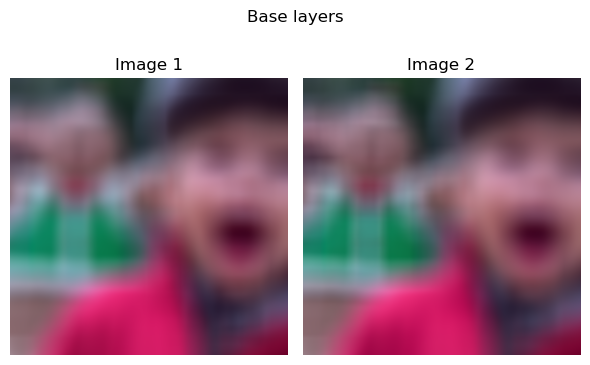

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


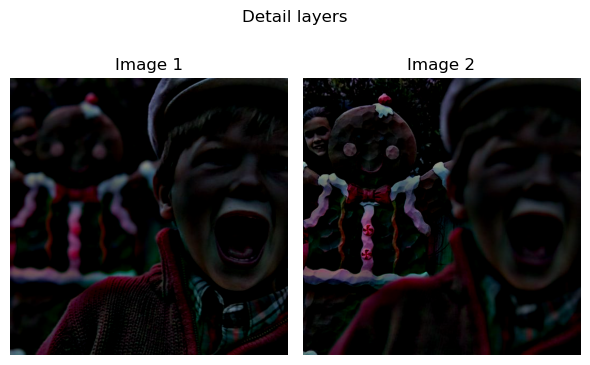


Computing saliency maps...


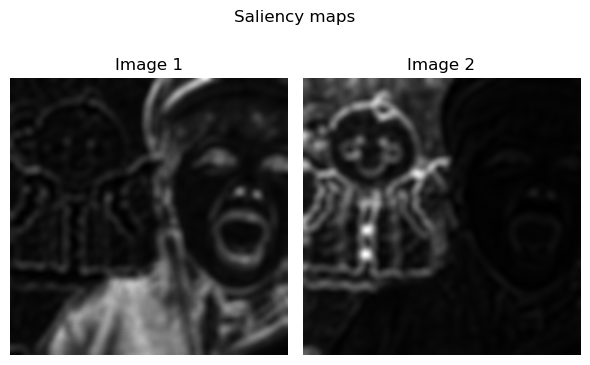


Computing weight maps...


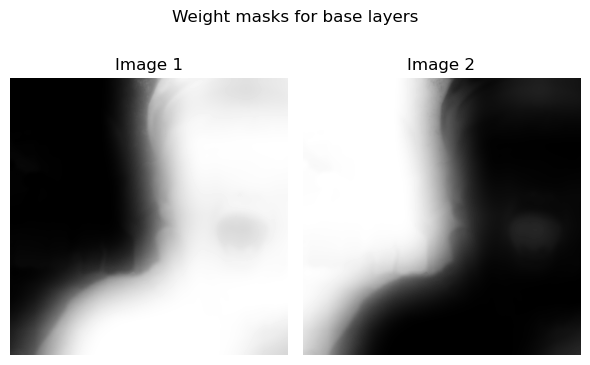

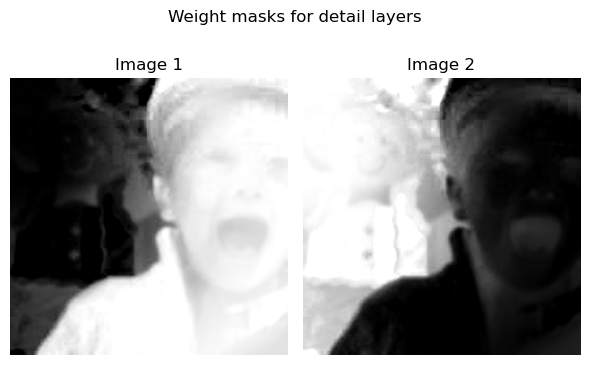

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Fusing layers...


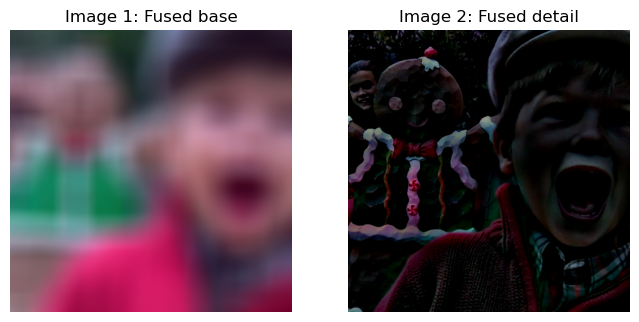

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Fused image:


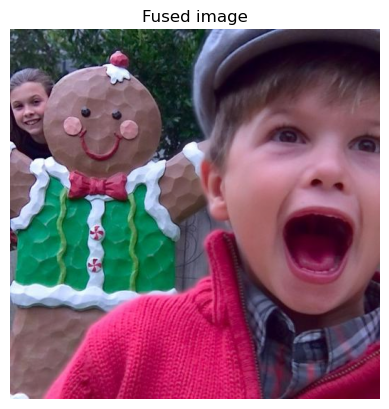

In [151]:
fused_test_img = fuse_images([test_img1, test_img2], r2=100, verbose=True)


Computing base and detail layers...


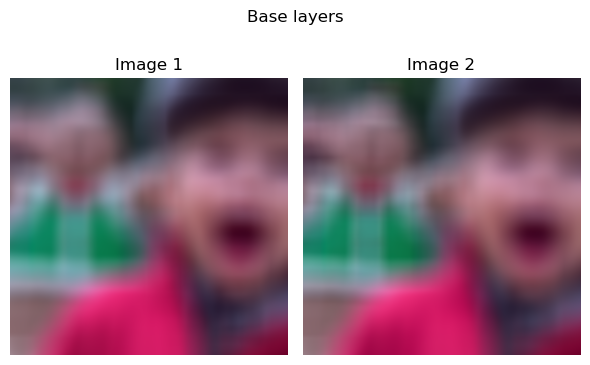

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


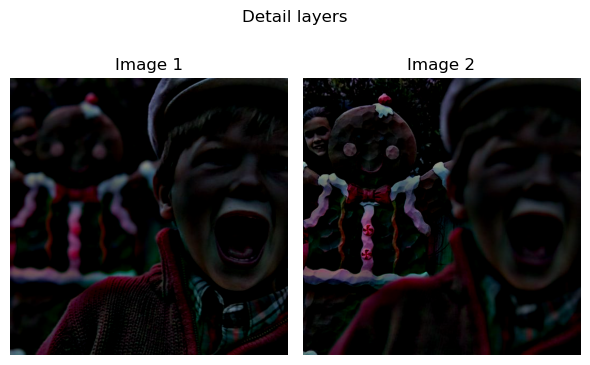


Computing saliency maps...


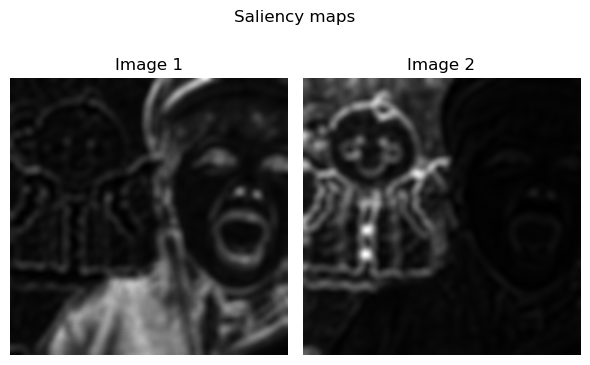


Computing weight maps...


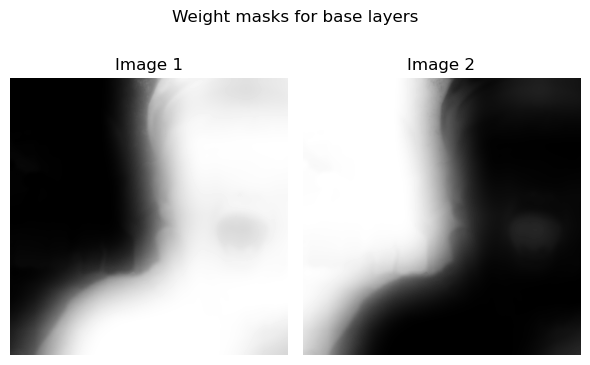

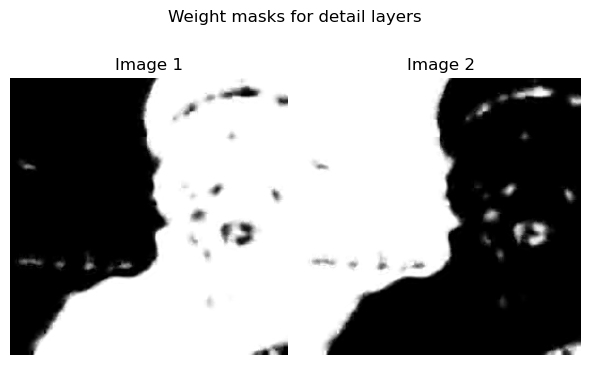

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Fusing layers...


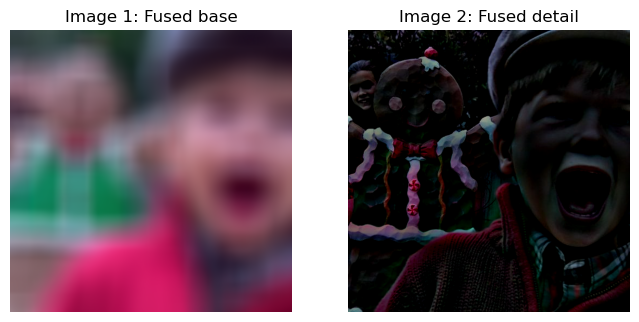

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Fused image:


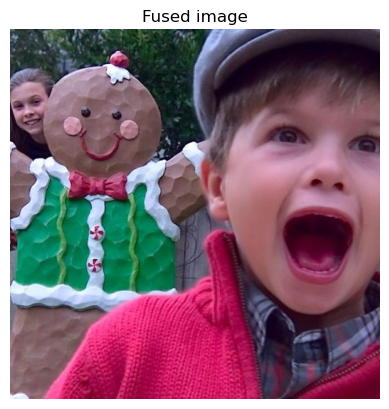

In [147]:
fused_test_img = fuse_images([test_img1, test_img2], r2=r2_standard, verbose=True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


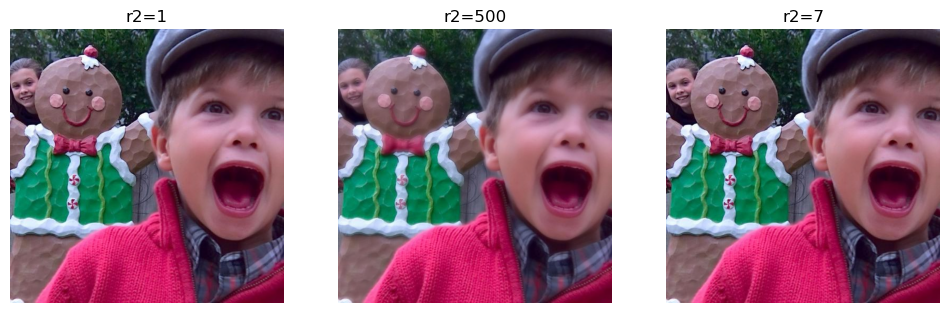

In [152]:
list_r2 = [1, 500, r2_standard]
_, axes = plt.subplots(1, 3, figsize=(12, 5))
for i, r2 in enumerate(list_r2):
    fused_test_img = fuse_images([test_img1, test_img2], r2=r2)
    axes[i].imshow(fused_test_img)
    axes[i].axis("off")
    axes[i].set_title(f"r2={r2}")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


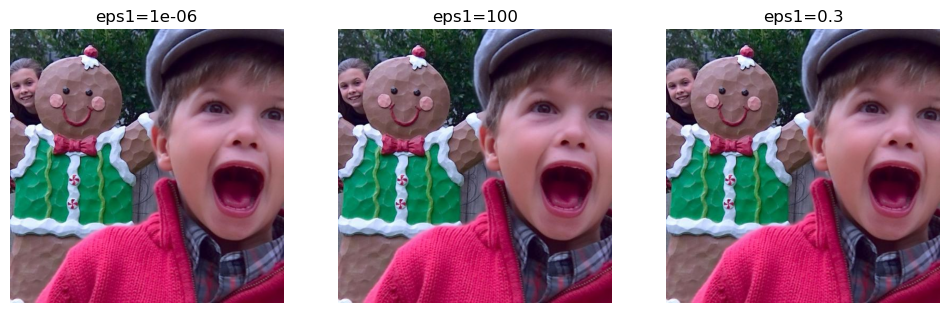

In [150]:
list_eps1 = [1e-6, 100, eps1_standard]
_, axes = plt.subplots(1, 3, figsize=(12, 5))
for i, eps1 in enumerate(list_eps1):
    fused_test_img = fuse_images([test_img1, test_img2], eps1=eps1)
    axes[i].imshow(fused_test_img)
    axes[i].axis("off")
    axes[i].set_title(f"eps1={eps1}")
plt.show()